In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing csv file
df = pd.read_csv("D:/Data_Analysis_Projects/Urban Water Consumption Optimisation/03_sql/water_usage.csv")
df.head()

,household_id,household_size,tariff_slab,district,date,temperature_c,rain_mm,kitchen_liters,bathroom_liters,laundry_liters,leak_probability,total_usage,per_capita_usage,leak_flag,efficiency_index
0,1,4,A,East,2024-01-01 00:00:00,19.8,0.0,95,210,78,4.00%,383,95.75,Normal,Efficient
1,1,4,A,East,2024-01-02 00:00:00,20.1,1.2,102,225,81,3.00%,408,102.00,Normal,Efficient
2,1,4,A,East,2024-01-03 00:00:00,22.5,0.0,98,235,76,5.00%,409,102.25,Normal,Efficient
3,2,3,B,West,2024-01-01 00:00:00,19.8,0.0,75,180,65,2.00%,320,106.67,Normal,Efficient
4,2,3,B,West,2024-01-02 00:00:00,20.1,1.2,82,170,60,3.00%,312,104.00,Normal,Efficient


In [4]:
# checking the shape of dataset
df.shape

(30, 15)

In [5]:
# checking column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   household_id      30 non-null     int64  
 1   household_size    30 non-null     int64  
 2   tariff_slab       30 non-null     object 
 3   district          30 non-null     object 
 4   date              30 non-null     object 
 5   temperature_c     30 non-null     float64
 6   rain_mm           30 non-null     float64
 7   kitchen_liters    30 non-null     int64  
 8   bathroom_liters   30 non-null     int64  
 9   laundry_liters    30 non-null     int64  
 10  leak_probability  30 non-null     object 
 11  total_usage       30 non-null     int64  
 12  per_capita_usage  30 non-null     float64
 13  leak_flag         30 non-null     object 
 14  efficiency_index  30 non-null     object 
dtypes: float64(3), int64(6), object(6)
memory usage: 3.6+ KB


In [6]:
# convert date column from object (text) to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# verify change
df[['date']].head()


,date
0,2024-01-01
1,2024-01-02
2,2024-01-03
3,2024-01-01
4,2024-01-02


In [7]:
# convert leak_probability to numeric (decimal)
df['leak_probability'] = pd.to_numeric(df['leak_probability'], errors='coerce')

# round to 2 decimal places
df['leak_probability'] = df['leak_probability'].round(2)

# verify
df[['leak_probability']].head()

,leak_probability
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [8]:
# check unique values in leak_probability
df['leak_probability'].unique()


array([nan])

In [9]:
import pandas as pd

df = pd.read_csv("D:/Urban Water Consumption Optimisation/sql/water_usage.csv")


In [10]:
df['leak_probability'].head(10)


0    4.00%
1    3.00%
2    5.00%
3    2.00%
4    3.00%
5    2.00%
6    6.00%
7    5.00%
8    7.00%
9    2.00%
Name: leak_probability, dtype: object

In [11]:
# remove % sign and convert to decimal
df['leak_probability'] = (
    df['leak_probability']
    .str.replace('%', '', regex=False)  # remove %
    .astype(float)                      # convert to float
    / 100                               # convert percentage to decimal
)

# round to 2 decimal places
df['leak_probability'] = df['leak_probability'].round(2)

# verify
df['leak_probability'].head()


0    0.04
1    0.03
2    0.05
3    0.02
4    0.03
Name: leak_probability, dtype: float64

In [12]:
# conforming datatypes once again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   household_id      30 non-null     int64  
 1   household_size    30 non-null     int64  
 2   tariff_slab       30 non-null     object 
 3   district          30 non-null     object 
 4   date              30 non-null     object 
 5   temperature_c     30 non-null     float64
 6   rain_mm           30 non-null     float64
 7   kitchen_liters    30 non-null     int64  
 8   bathroom_liters   30 non-null     int64  
 9   laundry_liters    30 non-null     int64  
 10  leak_probability  30 non-null     float64
 11  total_usage       30 non-null     int64  
 12  per_capita_usage  30 non-null     float64
 13  leak_flag         30 non-null     object 
 14  efficiency_index  30 non-null     object 
dtypes: float64(4), int64(6), object(5)
memory usage: 3.6+ KB


In [13]:
# check null values in each column
df.isnull().sum()


household_id        0
household_size      0
tariff_slab         0
district            0
date                0
temperature_c       0
rain_mm             0
kitchen_liters      0
bathroom_liters     0
laundry_liters      0
leak_probability    0
total_usage         0
per_capita_usage    0
leak_flag           0
efficiency_index    0
dtype: int64

In [14]:
# select numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# check if any negative values exist
(df[numeric_cols] < 0).sum()


household_id        0
household_size      0
temperature_c       0
rain_mm             0
kitchen_liters      0
bathroom_liters     0
laundry_liters      0
leak_probability    0
total_usage         0
per_capita_usage    0
dtype: int64

In [16]:
# daily total usage
daily_usage = df.groupby('date')['total_usage'].sum()
print(daily_usage)

date
2024-01-01 00:00:00    3694
2024-01-02 00:00:00    3831
2024-01-03 00:00:00    3915
Name: total_usage, dtype: int64


In [ ]:
# Average usage per district
district_avg = df.groupby('district')['total_usage'].mean()
print(district_avg)

district
East     299.750000
North    418.222222
West     453.222222
Name: total_usage, dtype: float64


In [20]:
# Convert leak_probability to float if it is in percentage string format
if df['leak_probability'].dtype == object:
    df['leak_probability'] = df['leak_probability'].str.replace('%', '').astype(float) / 100

# Set threshold for high leaks
leak_threshold = 0.05  # 5%

# Filter only high leak rows
high_leaks = df[df['leak_probability'] > leak_threshold]

# Keep only the columns you want: index, household_id, leak_probability, leak_flag
high_leaks = high_leaks[['household_id', 'leak_probability', 'leak_flag']]

# Show the result
print(high_leaks)


    household_id  leak_probability      leak_flag
6              3              0.06  Possible Leak
8              3              0.07  Possible Leak
12             5              0.08  Possible Leak
13             5              0.07  Possible Leak
14             5              0.09  Possible Leak
21             8              0.06  Possible Leak
23             8              0.06  Possible Leak


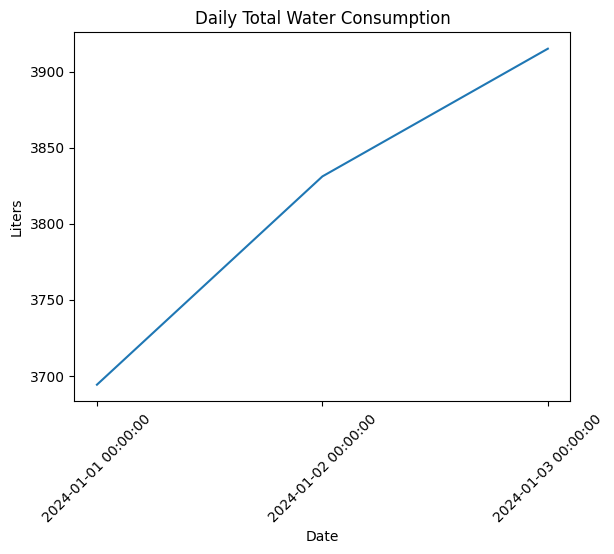

In [21]:
daily_usage = df.groupby('date')['total_usage'].sum()

plt.figure()
plt.plot(daily_usage.index, daily_usage.values)
plt.title('Daily Total Water Consumption')
plt.xlabel('Date')
plt.ylabel('Liters')
plt.xticks(rotation=45)
plt.show()


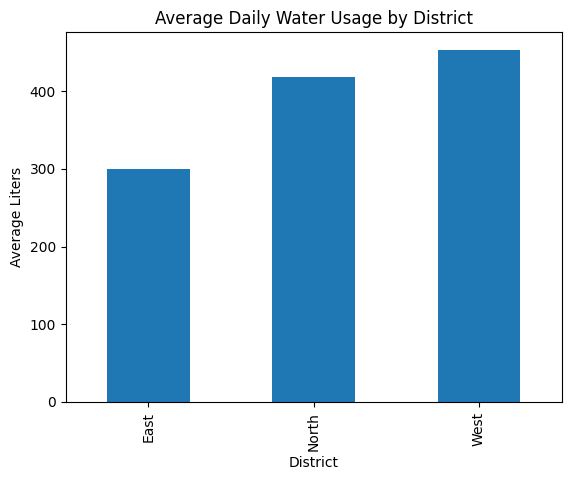

In [22]:
district_avg = df.groupby('district')['total_usage'].mean()

plt.figure()
district_avg.plot(kind='bar')
plt.title('Average Daily Water Usage by District')
plt.xlabel('District')
plt.ylabel('Average Liters')
plt.show()


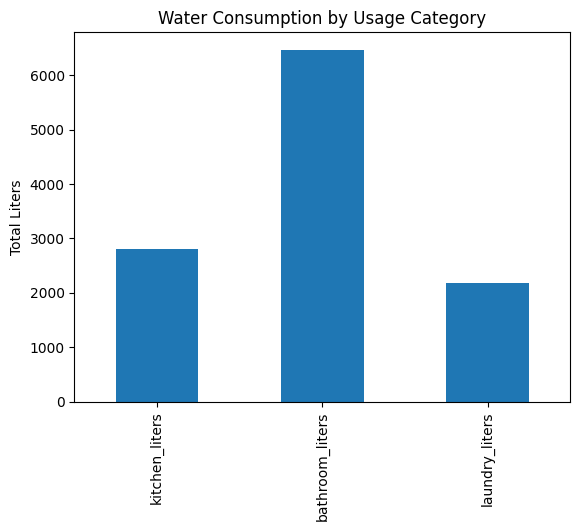

In [23]:
category_usage = df[['kitchen_liters', 'bathroom_liters', 'laundry_liters']].sum()

plt.figure()
category_usage.plot(kind='bar')
plt.title('Water Consumption by Usage Category')
plt.ylabel('Total Liters')
plt.show()


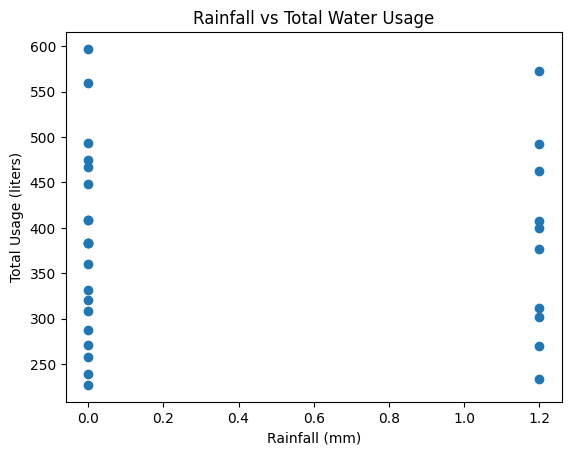

In [24]:
plt.figure()
plt.scatter(df['rain_mm'], df['total_usage'])
plt.title('Rainfall vs Total Water Usage')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Total Usage (liters)')
plt.show()


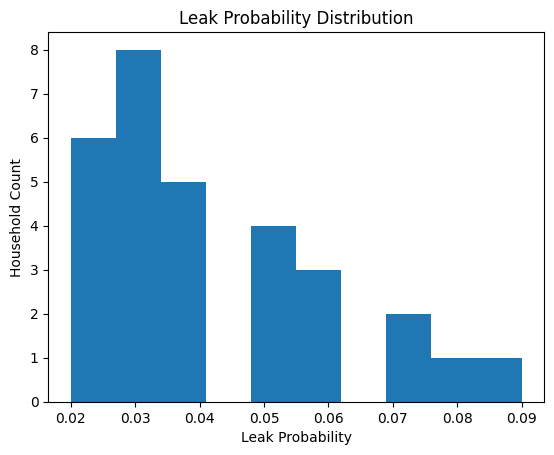

In [25]:
plt.figure()
plt.hist(df['leak_probability'], bins=10)
plt.title('Leak Probability Distribution')
plt.xlabel('Leak Probability')
plt.ylabel('Household Count')
plt.show()


In [3]:
df.to_csv("water_usage_cleaned.csv", index=False)
print("CSV file saved successfully!")

CSV file saved successfully!
